# Homework 2: Classification 

### Kobie Williams and Nyles Geiger 

##### 4/17/2022 

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB


In [154]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1oQMcpoR3QC7w_sWIbtyid2N2j0o49_pk') 
df.head(5) 

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [155]:
from sklearn.preprocessing import normalize 

In [156]:
#2a: 
from sklearn import preprocessing
#data 
X= df[['age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage']] 

#converting data into numeric format 
X = pd.get_dummies(X) 
#normalize the data 
Xnorm = preprocessing.normalize(X, norm='l2')

#target variable 
y = df['pep']


In [157]:
#Splitting data into training and test sets 
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnorm, y, test_size=0.2, random_state=0) 

In [158]:
#2b: 
testNorm = preprocessing.normalize(Xtest,norm='l1')

In [159]:
#KNN model and classifier 
model = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
model.fit(Xtrain, ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [160]:
ypred = model.predict(Xtest)
ypred

array(['YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO'], dtype=object)

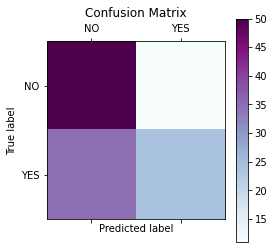

In [161]:
#confusion matrix 
cm = confusion_matrix(ytest,ypred) 

#Creating a list of the labels from the classes 
label_list = model.classes_ 

#plot the confusion matrix 
plt.matshow(cm, cmap='BuPu') 
plt.colorbar() 
plt.grid(False) 
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.xticks(np.arange(len(label_list)), label_list)
plt.yticks(np.arange(len(label_list)), label_list) 
plt.title('Confusion Matrix', pad=15) 
plt.show()

In [162]:
#Classification Report 
print("Classification Report: ")
print(classification_report(ytest, ypred))

Classification Report: 
              precision    recall  f1-score   support

          NO       0.59      0.82      0.68        61
         YES       0.69      0.41      0.51        59

    accuracy                           0.62       120
   macro avg       0.64      0.61      0.60       120
weighted avg       0.64      0.62      0.60       120



In [163]:
#We can do an experimentation of the different values with a grid search 
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 28),
              'metric': ['euclidean', 'manhattan'],
              'weights': ['uniform', 'distance']}
grid = GridSearchCV(model, param_grid, cv=5, verbose=1) 
grid.fit(Xtrain, ytrain) 
print('Best parameters found: ') 
print(grid.best_params_) 


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: 
{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}


In [164]:
bestModel = KNeighborsClassifier(n_neighbors=17, metric='manhattan') 

In [165]:
bestModel.fit(Xtrain, ytrain) 

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

In [166]:
best_ypred = bestModel.predict(Xtest)

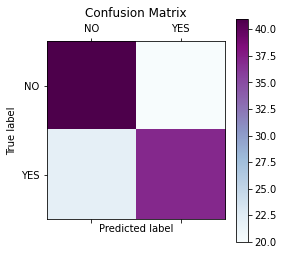

In [167]:
#confusion matrix 
best_cm = confusion_matrix(ytest,best_ypred) 

#Creating a list of the labels from the classes 
label_list = bestModel.classes_ 

#plot the confusion matrix 
plt.matshow(best_cm, cmap='BuPu') 
plt.colorbar() 
plt.grid(False) 
plt.ylabel('True label') 
plt.xlabel('Predicted label') 
plt.xticks(np.arange(len(label_list)), label_list)
plt.yticks(np.arange(len(label_list)), label_list) 
plt.title('Confusion Matrix', pad=15) 
plt.show()

In [168]:
#Classification Report 
print("Classification Report: ")
print(classification_report(ytest, best_ypred))

Classification Report: 
              precision    recall  f1-score   support

          NO       0.65      0.67      0.66        61
         YES       0.65      0.63      0.64        59

    accuracy                           0.65       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.65      0.65      0.65       120



In [169]:
from sklearn.tree import DecisionTreeClassifier 

In [170]:
#2c: 
tree = DecisionTreeClassifier() 

In [171]:
#Fit a model with the training data 
tree = tree.fit(Xtrain, ytrain)

treepred = tree.predict(Xtest) 

Text(0.5, 1.05, 'Confusion Matrix')

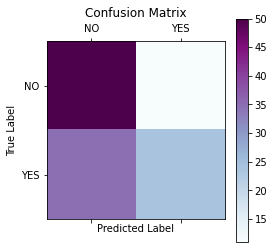

In [172]:
#confusion matrix for the tree 
tree_cm = confusion_matrix(ytest, ypred) 

tree_label_list = tree.classes_
plt.matshow(tree_cm, cmap='BuPu')
plt.colorbar()
plt.grid(False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(np.arange(len(tree_label_list)), tree_label_list)
plt.yticks(np.arange(len(tree_label_list)), tree_label_list)
plt.title('Confusion Matrix', pad=15) 

###3


In [173]:
census_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1_1ca-CLXqcXmaJpGYJjE1xVc8hoPIiQm')

In [174]:
census_df.head(1)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K


In [175]:
census_df.shape

(10000, 8)

In [176]:
age = census_df['age'] 

#Create a mask to identify rows that need a mask 
clean_age = age.str.contains('[^\?]') 

#Calculate the mean age 
mAge = age[clean_age].astype(int).mean() 

#Turning the age column back into itself with the cleaned data 
age[~clean_age] = mAge 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [177]:
work = census_df['workclass'] 

#Apply the mask 
clean_work = work.str.contains('[^\?]') 
census_df = census_df[clean_work]  

In [178]:
#3aii. 
census_df.describe(include='all')

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,72,3,NaN,2,5,2,NaN,2
top,31,Private,NaN,Married,White,Male,NaN,<=50K
freq,278,6947,NaN,4737,8062,6383,NaN,7093
mean,NaN,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,NaN,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,NaN,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,NaN,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


3aii: Histograms for Numeric values

In [179]:
census_df.head(1)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K


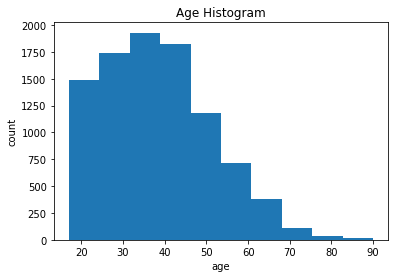

In [180]:

plt.hist(census_df['age'].astype(int))
plt.xlabel('age') 
plt.ylabel('count')
plt.title('Age Histogram') 
plt.show()

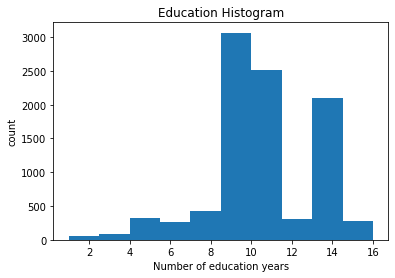

In [181]:
plt.hist(census_df['education'].astype(int))
plt.xlabel('Number of education years') 
plt.ylabel('count')
plt.title('Education Histogram') 
plt.show() 

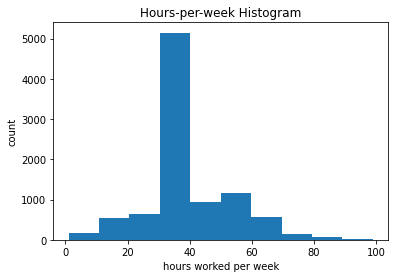

In [182]:
plt.hist(census_df['hours-per-week'].astype(int))
plt.xlabel('hours worked per week') 
plt.ylabel('count')
plt.title('Hours-per-week Histogram') 
plt.show()

3aii: Bar graphs for categorical attributes 

In [183]:
census_df.head(1)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K


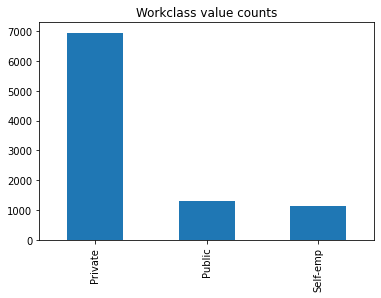

In [184]:
census_df['workclass'].value_counts().plot(kind='bar') 
plt.title('Workclass value counts')
plt.show()

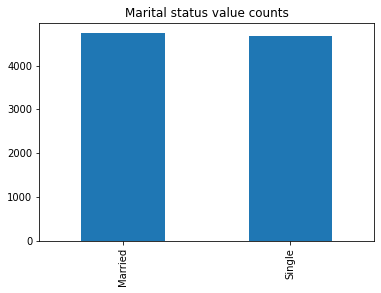

In [185]:
census_df['marital-status'].value_counts().plot(kind='bar') 
plt.title('Marital status value counts')
plt.show()

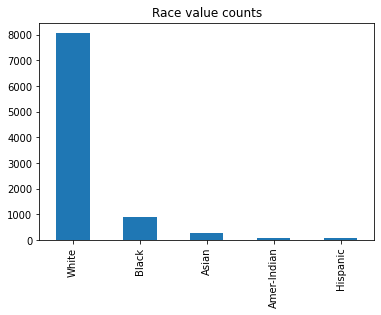

In [186]:
census_df['race'].value_counts().plot(kind='bar') 
plt.title('Race value counts')
plt.show()

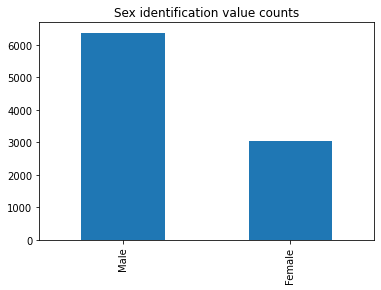

In [187]:
census_df['sex'].value_counts().plot(kind='bar') 
plt.title('Sex identification value counts')
plt.show()

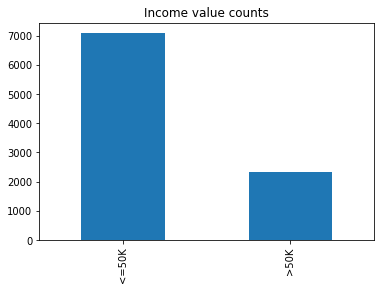

In [188]:
census_df['income'].value_counts().plot(kind='bar') 
plt.title('Income value counts')
plt.show()

3aiii: Cross-tabulations

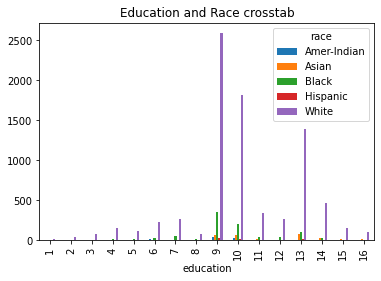

In [189]:
ed_race = pd.crosstab(census_df['education'], census_df['race'])
ed_race.plot(kind='bar')
plt.title('Education and Race crosstab')
plt.show() 

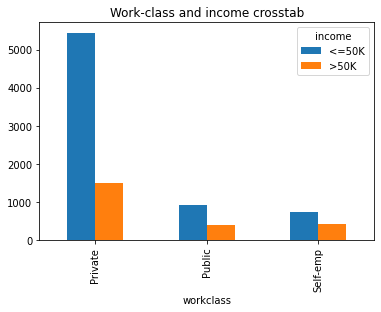

In [190]:
ed_race = pd.crosstab(census_df['workclass'], census_df['income'])
ed_race.plot(kind='bar')
plt.title('Work-class and income crosstab')
plt.show() 

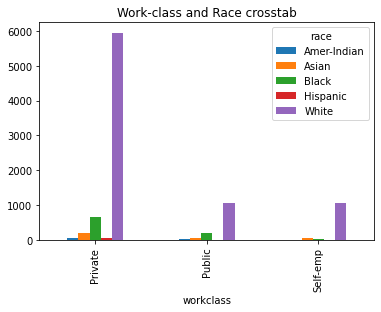

In [191]:
ed_race = pd.crosstab(census_df['workclass'], census_df['race'])
ed_race.plot(kind='bar')
plt.title('Work-class and Race crosstab')
plt.show() 

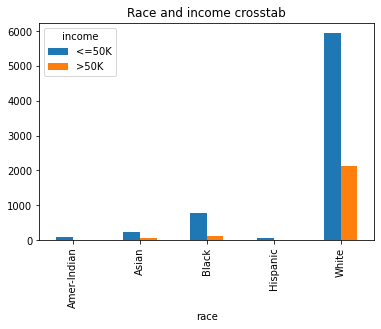

In [192]:
ed_race = pd.crosstab(census_df['race'], census_df['income'])
ed_race.plot(kind='bar')
plt.title('Race and income crosstab')
plt.show() 

In [193]:
#Creating something for the race+income 
race_income = census_df[['race', 'income']] 

In [194]:
#Getting the total amount of white people, black, asian, hispanic, amer-indian
tWhite = len(race_income[race_income=="White"])
tBlack = len(race_income[race_income=="Black"])
tAsain = len(race_income[race_income=="Asian"])
tHispanic = len(race_income[race_income=="Hispanic"])
tAmerIndian = len(race_income[race_income=="Amer-Indian"]) 

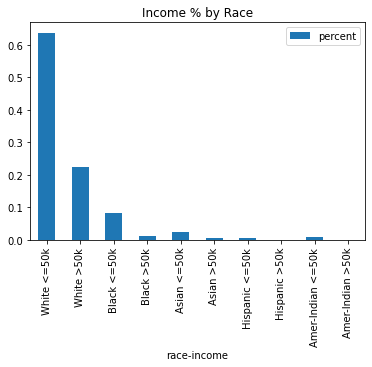

In [195]:
race_income_cats = ["White <=50k", "White >50k", \
                    "Black <=50k", "Black >50k",\
                    "Asian <=50k", "Asian >50k",\
                    "Hispanic <=50k", "Hispanic >50k",\
                    "Amer-Indian <=50k", "Amer-Indian >50k"]
race_income_percs = [5994/tWhite, 2118/tWhite,\
                    773/tBlack, 119/tBlack,\
                    224/tAsain, 67/tAsain,\
                    69/tHispanic, 6/tHispanic,\
                    83/tAmerIndian, 9/tAmerIndian]
race_percent = {'race-income': race_income_cats, 'percent': race_income_percs}

race_percent_df = df = pd.DataFrame(data=race_percent)

race_percent_df.plot(kind='bar', x="race-income",title="Income % by Race")

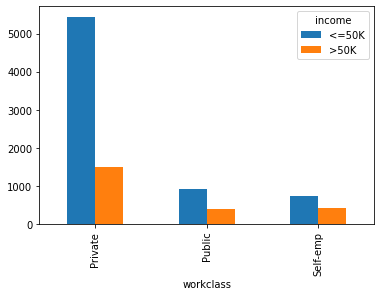

In [196]:
bar_df = pd.crosstab(census_df["workclass"], census_df["income"])
bar_df.plot(kind="bar")
plt.show()

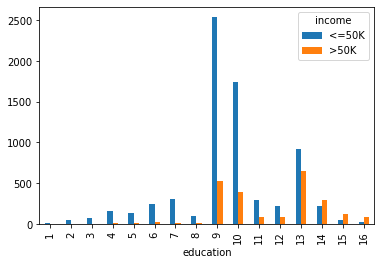

In [197]:
bar_df = pd.crosstab(census_df["education"], census_df["income"])
bar_df.plot(kind="bar")
plt.show()

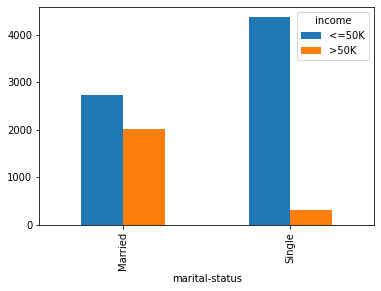

In [198]:
bar_df = pd.crosstab(census_df["marital-status"], census_df["income"])
bar_df.plot(kind="bar")
plt.show()

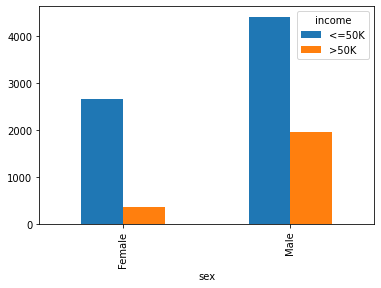

In [199]:
bar_df = pd.crosstab(census_df["sex"], census_df["income"])
bar_df.plot(kind="bar")
plt.show()

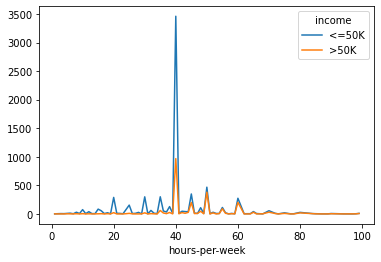

In [200]:
bar_df = pd.crosstab(census_df["hours-per-week"], census_df["income"])
bar_df.plot(kind="line")
plt.show()

Predictive Modeling and Model Evaluation 

In [201]:
census_df["age"] = pd.to_numeric(census_df["age"])
dum_census = pd.get_dummies(census_df)
print(dum_census.head(5))

X = dum_census.iloc[:, :-2]
y = dum_census.iloc[:, -1]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

    age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           

In [202]:
# Make a tree object using entropy to decide splits
gnb = GaussianNB()

# Fit a model to the training data
# (or, learn the decision tree)
gnb = gnb.fit(Xtrain, ytrain)

ypred = gnb.predict(Xtest)

### Classification Report 
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1414
           1       0.46      0.76      0.58       469

    accuracy                           0.72      1883
   macro avg       0.68      0.73      0.68      1883
weighted avg       0.79      0.72      0.74      1883



In [203]:
from sklearn.ensemble import RandomForestClassifier

Random Forest

In [249]:
#Random Forest Classifier 
rModel = RandomForestClassifier(n_estimators=7, random_state=0, criterion='entropy') 
rModel.fit(Xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=0)

In [250]:
rypred = rModel.predict(Xtest)

In [251]:
print("Random Forest Classification report")
print(classification_report(ytest, rypred))

Random Forest Classification report
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1414
           1       0.59      0.53      0.56       469

    accuracy                           0.79      1883
   macro avg       0.72      0.70      0.71      1883
weighted avg       0.78      0.79      0.79      1883



KNN Classifier

In [207]:
#KNN Classifier 
kModel = KNeighborsClassifier(n_neighbors=1, metric='euclidean') 
kModel.fit(Xtrain,ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [208]:
kypred = kModel.predict(Xtest) 

In [209]:
print('KNN Classification report') 
print(classification_report(ytest, kypred))

KNN Classification report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1414
           1       0.53      0.51      0.52       469

    accuracy                           0.76      1883
   macro avg       0.68      0.68      0.68      1883
weighted avg       0.76      0.76      0.76      1883



I see that the random forest classifier is better at classifying the information. This could be because it's such a vast amount of information. 